# Credit Card Risk Assessment 

This notebook classifies whether the customer will default or not for next month.

In [39]:
import pandas as pd
import seaborn as sns

In [2]:
credit_data = pd.read_csv('Credit_default_dataset.csv')
credit_data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
credit_data= credit_data.drop(["ID"],axis=1)
credit_data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
credit_data.rename(columns= {'PAY_0':'PAY_1'},inplace=True)
credit_data.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

## Data Pre Processing  

In [6]:
print("\n",credit_data[["EDUCATION"]],"\n",credit_data[["MARRIAGE"]])


        EDUCATION
0              2
1              2
2              2
3              2
4              2
...          ...
29995          3
29996          3
29997          2
29998          3
29999          2

[30000 rows x 1 columns] 
        MARRIAGE
0             1
1             2
2             2
3             1
4             1
...         ...
29995         1
29996         2
29997         2
29998         1
29999         1

[30000 rows x 1 columns]


In [7]:
credit_data["EDUCATION"] = credit_data["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
credit_data["MARRIAGE"] = credit_data["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [8]:
print("\n",credit_data[["EDUCATION"]],"\n",credit_data[["MARRIAGE"]])


        EDUCATION
0              2
1              2
2              2
3              2
4              2
...          ...
29995          3
29996          3
29997          2
29998          3
29999          2

[30000 rows x 1 columns] 
        MARRIAGE
0             1
1             2
2             2
3             1
4             1
...         ...
29995         1
29996         2
29997         2
29998         1
29999         1

[30000 rows x 1 columns]


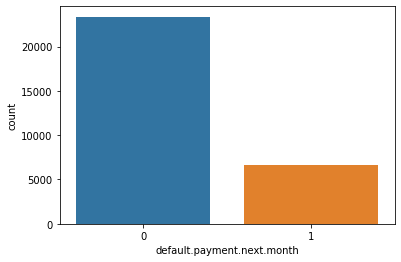

In [50]:
value = credit_data["default.payment.next.month"].value_counts()
sns.countplot(x=credit_data["default.payment.next.month"])

## Model Building using XGBoost

In [9]:
#Since we are using XGBoost, it is not required to run standard scaling at all. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = credit_data.drop(["default.payment.next.month"],axis=1)
X = sc.fit_transform(X)

In [10]:
y = credit_data['default.payment.next.month']

In [11]:
import xgboost
classifier = xgboost.XGBClassifier()

In [12]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [13]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

In [14]:
score

array([0.80573142, 0.81006331, 0.81672776, 0.80939687, 0.82333333,
       0.831     , 0.83727909, 0.83327776, 0.82894298, 0.8276092 ])

In [15]:
score.mean()

0.8223361729892045

## Using Hyperparameters Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

In [20]:
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,7,8,9,10,12,15],
    "min_child_weight" : [1,3,5,6,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
    
}

In [26]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [28]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   56.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                     

In [29]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [30]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 7,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [32]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)

In [34]:
score.mean()

0.820235728426192